# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

new_cities= []
cloudiness = []
country_code = []
humidity = []
lat = []
long = []
temp = []
wind_speed = []
 

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        new_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country_code.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        print(city)
    except (KeyError, IndexError):
        print("City not found. Skipping...")

vlad tepes
ushuaia
terme
hilo
monastyrshchina
vila franca do campo
khatanga
tezu
City not found. Skipping...
chimbote
kungurtug
busselton
klaksvik
turkmenabat
yellowknife
City not found. Skipping...
City not found. Skipping...
moyale
constitucion
City not found. Skipping...
mataura
tasiilaq
City not found. Skipping...
albany
rikitea
marsh harbour
qena
atuona
chara
gboko
riverton
anamur
yumen
punta arenas
hobart
arraial do cabo
longyearbyen
ambagarh chauki
campos belos
matay
iqaluit
ponnani
ancud
lebu
tiksi
yelizovo
City not found. Skipping...
kapaa
mar del plata
victoria
bengkulu
qaanaaq
liverpool
fairbanks
chongwe
cape town
kharod
ochakiv
lorengau
new norfolk
taltal
comodoro rivadavia
City not found. Skipping...
naze
bosaso
bluff
hithadhoo
bathurst
hambantota
piney green
san francisco
port elizabeth
tsabong
cidreira
dukat
chuy
caravelas
mount gambier
salalah
east london
paamiut
dosso
okhotsk
churapcha
City not found. Skipping...
provideniya
klyuchevskiy
City not found. Skipping...
let

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
import json
weather_dict = {
    "City": new_cities,
    "Cloudiness": cloudiness,
    "Country": country_code,
    "Date": response["dt"],
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": temp,
    "Wind Speed": wind_speed
}
city_weather = pd.DataFrame(weather_dict)
city_weather.to_csv("city_weather.csv")
#print(json.dumps(response, indent=4, sort_keys=True))
city_weather.count()


City               562
Cloudiness         562
Country            562
Date               562
Humidity           562
Latitude           562
Longitude          562
Max Temperature    562
Wind Speed         562
dtype: int64

In [5]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Saint-Philippe,86,RE,1579906527,100,-21.36,55.77,78.80,21.92
1,Pauini,100,BR,1579906527,98,-7.71,-66.98,75.25,3.38
2,Dunedin,90,NZ,1579906527,84,-45.87,170.50,64.00,17.00
3,New Norfolk,75,AU,1579906527,48,-42.78,147.06,66.00,19.46
4,Ushuaia,75,AR,1579906527,62,-54.80,-68.30,53.60,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

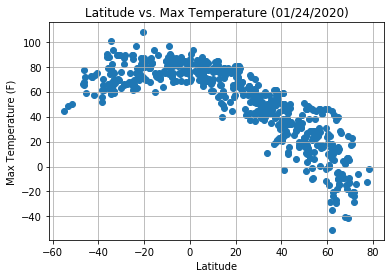

In [9]:
plt.scatter(city_weather["Latitude"],city_weather["Max Temperature"])
plt.title("Latitude vs. Max Temperature (01/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Output/lat_vs_temp.png")

# Latitude vs. Humidity Plot

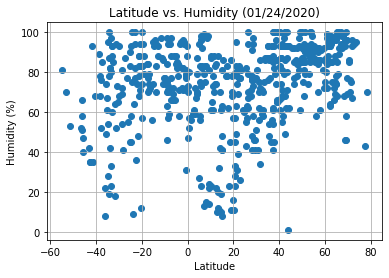

In [11]:
plt.scatter(city_weather["Latitude"],city_weather["Humidity"])
plt.title("Latitude vs. Humidity (01/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Output/lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

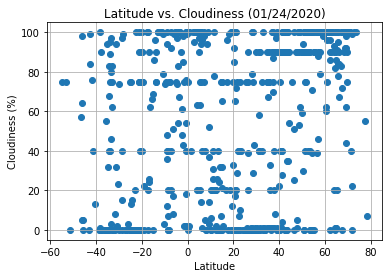

In [12]:
plt.scatter(city_weather["Latitude"],city_weather["Cloudiness"])
plt.title("Latitude vs. Cloudiness (01/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Output/lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

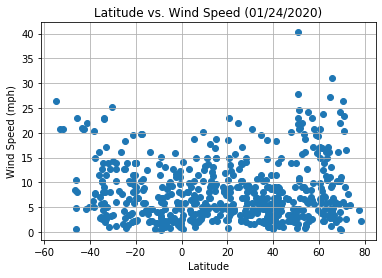

In [13]:
plt.scatter(city_weather["Latitude"],city_weather["Wind Speed"])
plt.title("Latitude vs. Wind Speed (01/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Output/lat_vs_wind.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_weather.loc[city_weather["Latitude"] > 0]
southern_df = city_weather.loc[city_weather["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8741719964228895


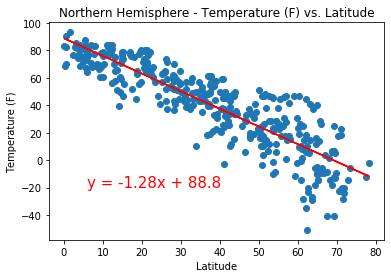

In [15]:
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/nh_temp_vs_lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4526866084949411


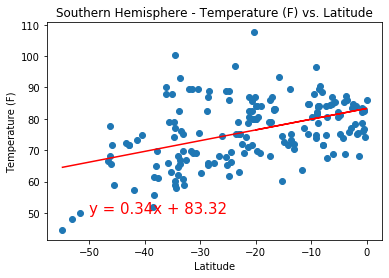

In [16]:
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/sh_temp_vs_lat.png")
plt.show()

These two linear relationships show a strong negative correlation and a weak positive correlation respectively. In the northern hemisphere, an increase in latitude fairly reliably predicts a decrease in humidity. In the southern hemisphere, humidity may increase as latitude increases, but not always.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.43105836530616837


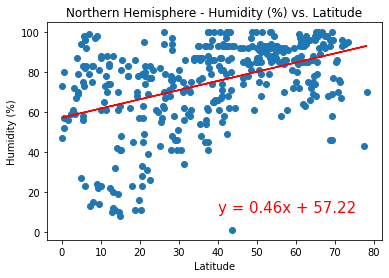

In [17]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/nh_humidity_vs_lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33818617997985245


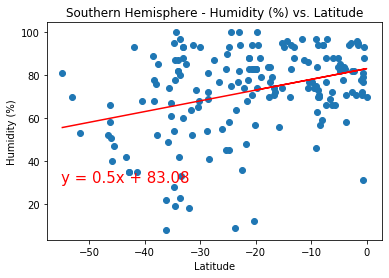

In [18]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/sh_humidity_vs_lat.png")
plt.show()

The above two plots show a weak positive correlation between latitude and humidity. There are many instances where a higher latitude corresponds to more humidity, but there are several instances where this is not the case, weakening the relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30190245566425966


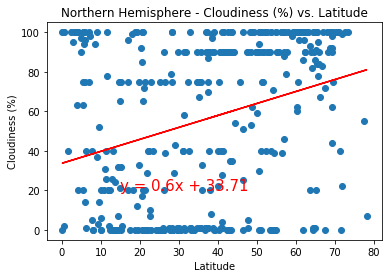

In [19]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/nh_clouds_vs_lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2589638187408882


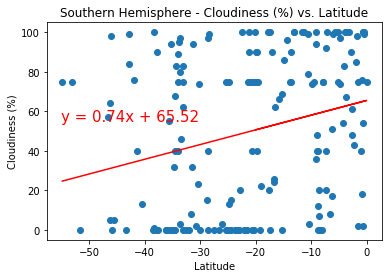

In [20]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/sh_clouds_vs_lat.png")
plt.show()

There is a weak positive correlation between Northern Hemisphere latitude and cloudiness. There are many cities at a wide range of latitudes that either show maximum or minimum cloudiness, but there is no obvious pattern behind the distribution of the rest. In the southern hemisphere, there is a moderate positive correlation between latitude and cloudiness. A cluster of cities near the equator show a high degree of cloudiness, but many cities in the middle of the graph show 0% cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1455349710261905


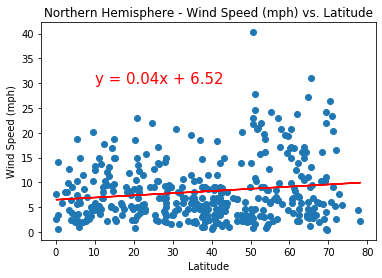

In [22]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/nh_wind_vs_lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3731294291866658


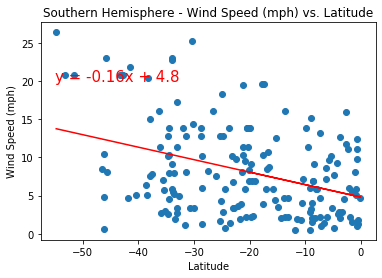

In [23]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Output/nh_wind_vs_lat.png")
plt.show()

In the northern hemisphere, latitude is weakly positively correlated with wind speed. There is a cluster of cities with high wind speed and a high latitude. However, the vast majority of the cities have a low wind speed. In the southern hemisphere, latitude is weakly negatively correlated with wind speed, based on the cluster of cities nearest the equator with low wind speed.

3 trends based on the data:

1. Max temperature decreases with latitude increase because those regions receive less sunlight (Source: World Atlas)
2. Higher cloud coverage near the equator due to the sinking of cool air near 30 degrees latitude North and South of the equator colliding with warm air rising near the equator (Source: NASA).
3. In the Southern Hemisphere, there is a cluster of more humid cities that could be a result of a warmer temperature, and thus the air is more able to hold water vapor (Source: National Snow & Ice Data Center).